## A)  I have taken real_time _amazon data on open API in JSON Format and I extract the JSON data from it

In [16]:
import requests

url = "https://real-time-amazon-data.p.rapidapi.com/search"

querystring = {"query":"Phone","page":"1","country":"US","category_id":"aps"}

headers = {
	"X-RapidAPI-Key": "f7d5461423msh37c7ea001e56b13p183362jsnc89453efb04e",
	"X-RapidAPI-Host": "real-time-amazon-data.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

{'status': 'OK', 'request_id': '7b326f25-bfaf-4361-836c-9c89ae84a383', 'data': {'total_products': 10770, 'country': 'US', 'domain': 'www.amazon.com', 'products': [{'asin': 'B0CSB1GX4H', 'product_title': 'Samsung Galaxy A15 (SM-155M/DSN), 128GB 6GB RAM, Dual SIM, Factory Unlocked GSM, International Version (Wall Charger Bundle) (Yellow)', 'product_price': '$152.69', 'product_original_price': '$160.00', 'currency': 'USD', 'product_star_rating': '4.5', 'product_num_ratings': 82, 'product_url': 'https://www.amazon.com/dp/B0CSB1GX4H', 'product_photo': 'https://m.media-amazon.com/images/I/51rK-Be8dxL._AC_SX444_SY639_FMwebp_QL65_.jpg', 'product_num_offers': None, 'product_minimum_offer_price': '$152.69', 'is_best_seller': False, 'is_amazon_choice': False, 'is_prime': True, 'climate_pledge_friendly': False, 'sales_volume': '500+ bought in past month', 'delivery': 'FREE delivery Mon, Apr 22 Or fastest delivery Thu, Apr 18'}, {'asin': 'B0BQ118F2T', 'product_title': 'Moto G Play 2023 3-Day Batter

## B)Here comes the Data visulaization part in matplotlib library

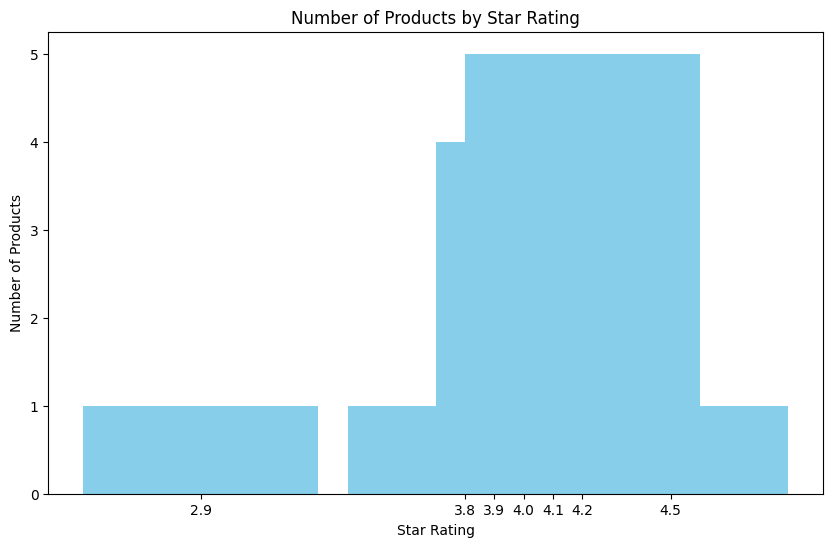

In [17]:
import matplotlib.pyplot as plt

# Extracting product data from the JSON
products = response.json()['data']['products']

# Counting the number of products with different star ratings
star_ratings = [float(product['product_star_rating']) for product in products if product['product_star_rating']]
star_rating_counts = {rating: star_ratings.count(rating) for rating in set(star_ratings)}

# Sorting the ratings for plotting
sorted_ratings = sorted(star_rating_counts.items())

# Extracting data for plotting
ratings, counts = zip(*sorted_ratings)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(ratings, counts, color='skyblue')
plt.xlabel('Star Rating')
plt.ylabel('Number of Products')
plt.title('Number of Products by Star Rating')
plt.xticks(ratings)
plt.show()


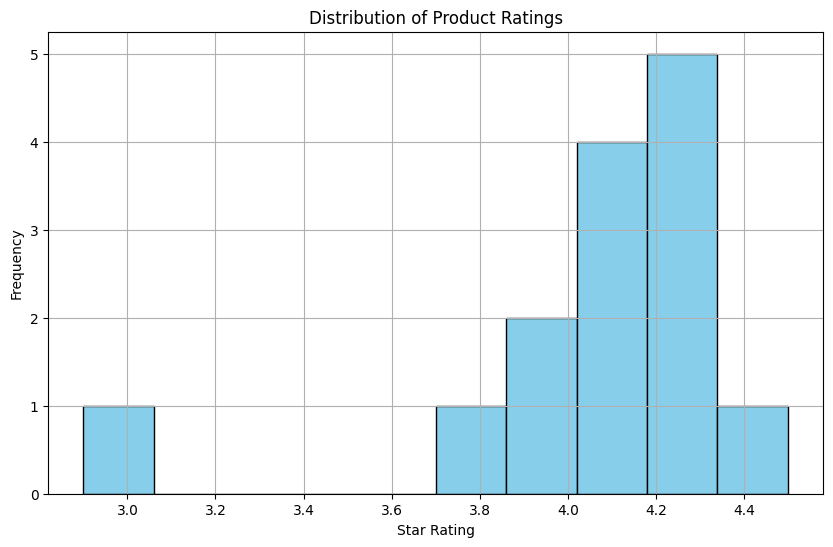

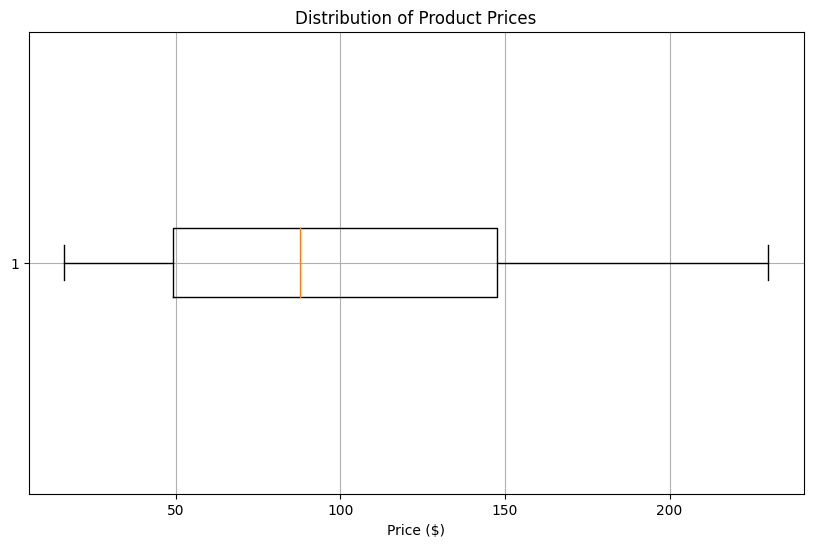

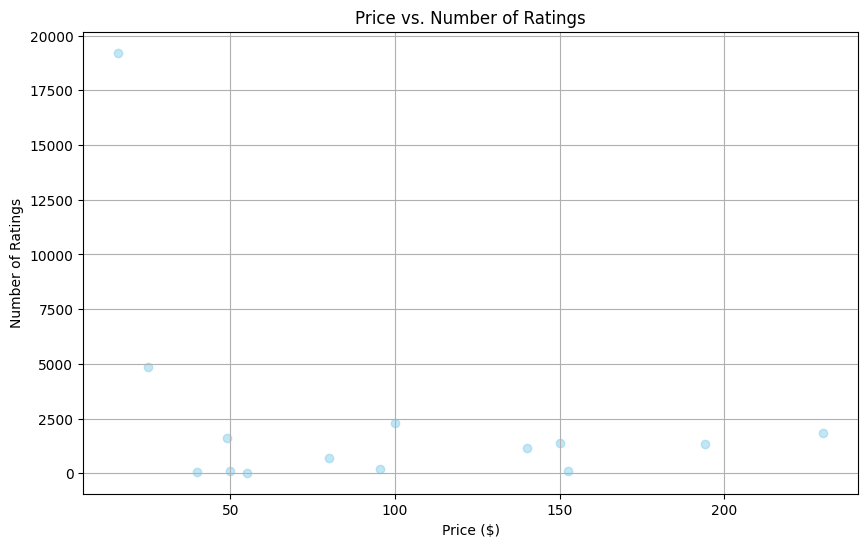

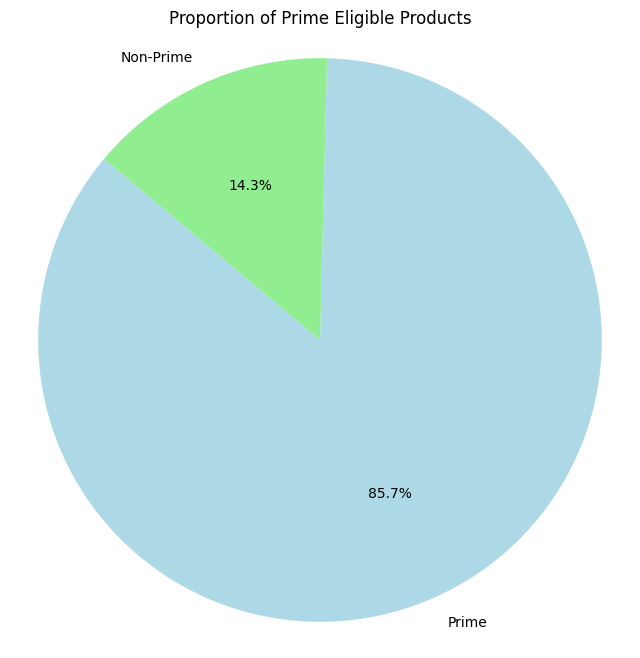

In [18]:
import matplotlib.pyplot as plt

# Extracting product data from the JSON
products = response.json()['data']['products']

# 1. Histogram of Product Ratings
ratings = [float(product['product_star_rating']) for product in products if product['product_star_rating']]
plt.figure(figsize=(10, 6))
plt.hist(ratings, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Star Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Product Ratings')
plt.grid(True)
plt.show()

# 2. Box Plot of Product Prices
prices = [float(product['product_price'].replace('$', '')) for product in products if product['product_price']]
plt.figure(figsize=(10, 6))
plt.boxplot(prices, vert=False)
plt.xlabel('Price ($)')
plt.title('Distribution of Product Prices')
plt.grid(True)
plt.show()

# 3. Scatter Plot of Price vs. Number of Ratings
prices = [float(product['product_price'].replace('$', '')) for product in products if product['product_price']]
num_ratings = [product['product_num_ratings'] for product in products]
plt.figure(figsize=(10, 6))
plt.scatter(prices, num_ratings, color='skyblue', alpha=0.5)
plt.xlabel('Price ($)')
plt.ylabel('Number of Ratings')
plt.title('Price vs. Number of Ratings')
plt.grid(True)
plt.show()

# 4. Pie Chart of Prime Eligibility
prime_counts = {'Prime': sum([1 for product in products if product['is_prime']]), 'Non-Prime': len(products) - sum([1 for product in products if product['is_prime']])}
labels = prime_counts.keys()
sizes = prime_counts.values()
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen'])
plt.title('Proportion of Prime Eligible Products')
plt.axis('equal')
plt.show()


I have done some Data visualization in Dash library

In [19]:
pip install dash

In [20]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Sample DataFrame (Replace this with your actual data)
df = pd.DataFrame({
    "product_title": ["Product A", "Product B", "Product C"],
    "product_price": [100, 150, 200],
    "product_star_rating": [4.2, 4.5, 3.9],
    "sales_volume": [500, 700, 300],
    "timestamp": pd.date_range("2024-01-01", periods=3)
})

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the app layout
app.layout = html.Div([
    html.H1("Product Analysis Dashboard"),

    # Interactive product comparison
    html.Div([
        html.H2("Product Comparison"),
        dcc.Dropdown(
            id='product-dropdown',
            options=[{'label': product, 'value': product} for product in df['product_title']],
            value=df['product_title'][0]
        ),
        dcc.Graph(id='product-comparison-graph')
    ]),

    # Time series analysis
    html.Div([
        html.H2("Time Series Analysis"),
        dcc.RadioItems(
            id='time-series-selector',
            options=[
                {'label': 'Product Price', 'value': 'product_price'},
                {'label': 'Product Star Rating', 'value': 'product_star_rating'},
                {'label': 'Sales Volume', 'value': 'sales_volume'}
            ],
            value='product_price',
            labelStyle={'display': 'block'}
        ),
        dcc.Graph(id='time-series-graph')
    ])
])

# Callback for updating product comparison graph
@app.callback(
    Output('product-comparison-graph', 'figure'),
    [Input('product-dropdown', 'value')]
)
def update_product_comparison(product):
    fig = px.bar(df[df['product_title'] == product], x='product_title', y=['product_price', 'product_star_rating', 'sales_volume'],
                 title=f'{product} Comparison', barmode='group')
    return fig

# Callback for updating time series graph
@app.callback(
    Output('time-series-graph', 'figure'),
    [Input('time-series-selector', 'value')]
)
def update_time_series(selector):
    fig = px.line(df, x='timestamp', y=selector, title=f'{selector} Over Time')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>